<a href="https://colab.research.google.com/github/HChandeepa/Lung_Sound_Classification_System/blob/Master/Audio_Feature_Extraction_and_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Corresponding normalized folders
folder_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiectasis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiolitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/COPD Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Healthy Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Lung Fibrosis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Plueral Effusion Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Pneumonia Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/URTI Normalized'
]

In [ ]:
import os
import random

# Function to randomly select and keep a specific number of files, and delete the rest
def keep_random_files(folder_path, num_files_to_keep):
    # Get the list of all .wav files in the folder
    all_files = [f for f in os.listdir(folder_path) if f.endswith(".wav")]

    # Randomly select 'num_files_to_keep' files to keep
    files_to_keep = random.sample(all_files, num_files_to_keep)

    # Iterate over all files and delete those that are not in the selected 'files_to_keep'
    for file in all_files:
        if file not in files_to_keep:
            file_path = os.path.join(folder_path, file)
            os.remove(file_path)  # Delete the file
            print(f"Deleted: {file_path}")

    print(f"Kept {num_files_to_keep} files in {folder_path}")

# Set folder paths for Asthma and COPD directories
asthma_folder = '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized'
copd_folder = '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/COPD Normalized'

# Number of files to keep from each folder
num_files_to_keep = 200

# Keep 200 files in Asthma folder and delete the rest
keep_random_files(asthma_folder, num_files_to_keep)

# Keep 200 files in COPD folder and delete the rest
keep_random_files(copd_folder, num_files_to_keep)


Deleted: /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized/normalized_BP106_Asthma,E W,P L U,45,F_segment_3.wav
Deleted: /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized/normalized_BP1_Asthma,I E W,P L L,70,M_segment_0.wav
Deleted: /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized/normalized_BP1_Asthma,I E W,P L L,70,M_segment_1.wav
Deleted: /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized/normalized_BP1_Asthma,I E W,P L L,70,M_segment_2.wav
Deleted: /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized/normalized_BP10_Asthma,E W,P R U,59,M_segment_0.wav
Deleted: /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized/normalized_BP104_Asthma,E W,P L U,45,F_segment_0.wav
Deleted: /content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/A

In [ ]:
# Loop through each folder and count the number of .wav files
for folder in folder_paths:
    if os.path.exists(folder):
        count = len([f for f in os.listdir(folder) if f.endswith('.wav')])
        folder_name = os.path.basename(folder)  # Get the folder name (like Asthma, COPD, etc.)
        print(f"Folder: {folder_name}, Count: {count}")
    else:
        print(f"Folder: {folder} does not exist!")

Folder: Asthma Normalized, Count: 200
Folder: Bronchiectasis Normalized, Count: 200
Folder: Bronchiolitis Normalized, Count: 200
Folder: Bronchitis Normalized, Count: 200
Folder: COPD Normalized, Count: 200
Folder: Healthy Normalized, Count: 1900
Folder: Lung Fibrosis Normalized, Count: 200
Folder: Plueral Effusion Normalized, Count: 200
Folder: Pneumonia Normalized, Count: 200
Folder: URTI Normalized, Count: 200


In [ ]:
import os
import librosa
import numpy as np

# Feature extraction parameters
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set a fixed length for all audio samples

# Function to extract MFCC, Mel Spectrogram, and Chromagram from an audio file
def extract_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC (128 coefficients, fixed shape)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    # Extract Mel Spectrogram and match the frequency axis to MFCC (128 bins)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))  # Reshape to (128, 264)

    # Extract Chromagram and match the frequency axis to MFCC (12 bins resized to 128)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))  # Reshape to (128, 264)

    # Debug: Print shapes of each feature
    print(f"MFCC shape: {mfcc.shape}, Mel Spectrogram shape: {mel_spectrogram.shape}, Chromagram shape: {chroma_stft.shape}")

    # Stack MFCC, Mel Spectrogram, and Chromagram along the third axis to create a 3D array
    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)

    return features_3d

# Function to extract features from all audio files in a folder
def extract_features_from_folder(folder_path):
    features = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder_path, filename)
            features_3d = extract_features(file_path)
            features.append(features_3d)
    return np.array(features)

# Extract features from all folders and combine them
all_features = []
for folder in folder_paths:
    folder_features = extract_features_from_folder(folder)
    all_features.append(folder_features)

# Convert to a single numpy array
all_features = np.concatenate(all_features, axis=0)

print("Feature extraction complete! Shape of extracted features:", all_features.shape)


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


MFCC shape: (128, 264), Mel Spectrogram shape: (128, 264), Chromagram shape: (128, 264)
MFCC shape: (128, 264), Mel Spectrogram shape: (128, 264), Chromagram shape: (128, 264)
MFCC shape: (128, 264), Mel Spectrogram shape: (128, 264), Chromagram shape: (128, 264)
MFCC shape: (128, 264), Mel Spectrogram shape: (128, 264), Chromagram shape: (128, 264)
MFCC shape: (128, 264), Mel Spectrogram shape: (128, 264), Chromagram shape: (128, 264)
MFCC shape: (128, 264), Mel Spectrogram shape: (128, 264), Chromagram shape: (128, 264)
MFCC shape: (128, 264), Mel Spectrogram shape: (128, 264), Chromagram shape: (128, 264)
MFCC shape: (128, 264), Mel Spectrogram shape: (128, 264), Chromagram shape: (128, 264)
MFCC shape: (128, 264), Mel Spectrogram shape: (128, 264), Chromagram shape: (128, 264)
MFCC shape: (128, 264), Mel Spectrogram shape: (128, 264), Chromagram shape: (128, 264)
MFCC shape: (128, 264), Mel Spectrogram shape: (128, 264), Chromagram shape: (128, 264)
MFCC shape: (128, 264), Mel Spec

In [ ]:
# Corresponding normalized folders
labels = {
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized': 0,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiectasis Normalized': 0,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiolitis Normalized': 0,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchitis Normalized': 0,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/COPD Normalized': 0,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Healthy Normalized': 1,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Lung Fibrosis Normalized': 0,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Plueral Effusion Normalized': 0,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Pneumonia Normalized': 0,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/URTI Normalized': 0
}

In [ ]:
# Assign labels to each sample in all_features
all_labels = []
for folder, label in labels.items():
    folder_labels = [label] * len(os.listdir(folder))  # Label all samples in the folder
    all_labels.extend(folder_labels)

# Convert to numpy array
all_labels = np.array(all_labels)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (2960, 128, 264, 3), Training labels shape: (2960,)
Test data shape: (740, 128, 264, 3), Test labels shape: (740,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Input shape of the 3D features (MFCC, Mel Spectrogram, Chromagram)
input_shape = (128, 264, 3)  # 128x264 (height x width), 3 channels

# Define the CNN model
model = Sequential()

# 1st Conv Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv Layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Conv Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Conv Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5th Conv Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Dense Layer with Dropout to avoid overfitting
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and Binary Crossentropy loss function
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 262, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 131, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 129, 32)         │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 14, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 12, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 926,881 (3.54 MB)

 Trainable params: 926,881 (3.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

print("Model training complete!")


Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.5236 - loss: 0.8430 - val_accuracy: 0.5108 - val_loss: 0.6851
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.5695 - loss: 0.6822 - val_accuracy: 0.6149 - val_loss: 0.6584
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.5966 - loss: 0.6566 - val_accuracy: 0.6568 - val_loss: 0.6257
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6435 - loss: 0.6179 - val_accuracy: 0.6270 - val_loss: 0.6357
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.6597 - loss: 0.6077 - val_accuracy: 0.6797 - val_loss: 0.5919
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.6993 - loss: 0.5656 - val_accuracy: 0.6514 - val_loss: 0.6137
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6833 - loss: 0.5681 - val_accuracy: 0.7108 - val_loss: 0.5772
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7223 - loss: 0.5523 - val_accuracy: 0.

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 449ms/step - accuracy: 0.8873 - loss: 0.2629
Test Accuracy: 88.38%


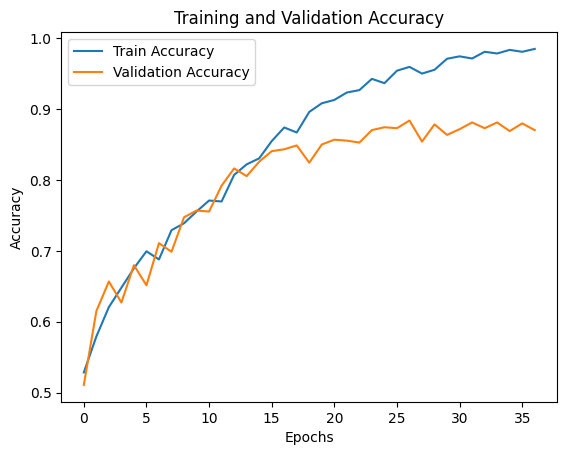

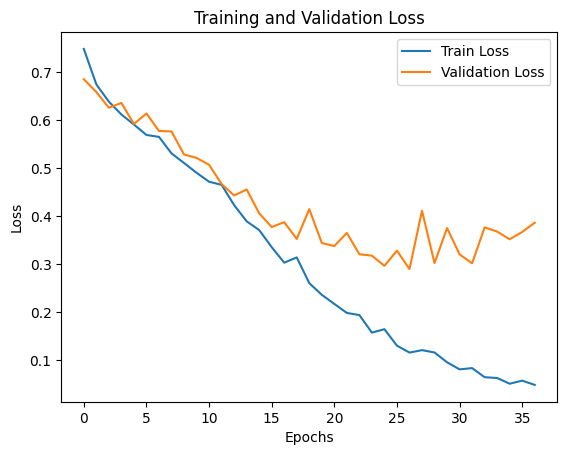

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
model.save('lung_sound_binary_classification_model.h5')
print("Model saved!")

Model saved!


24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 469ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       360
           1       0.90      0.88      0.89       380

    accuracy                           0.88       740
   macro avg       0.88      0.88      0.88       740
weighted avg       0.88      0.88      0.88       740



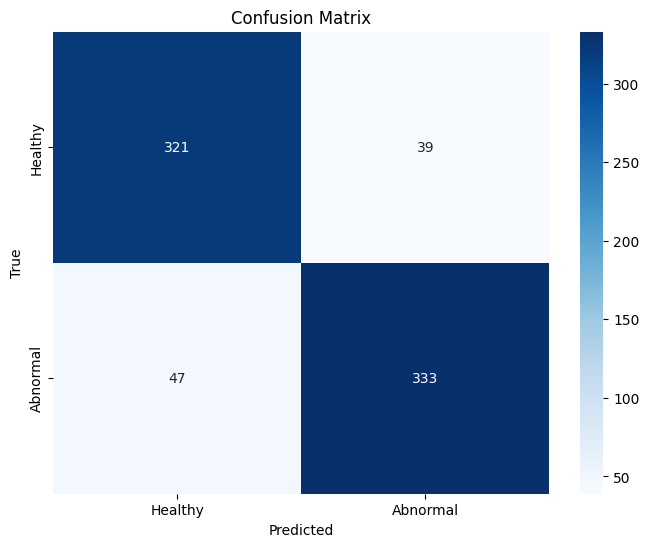

24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step


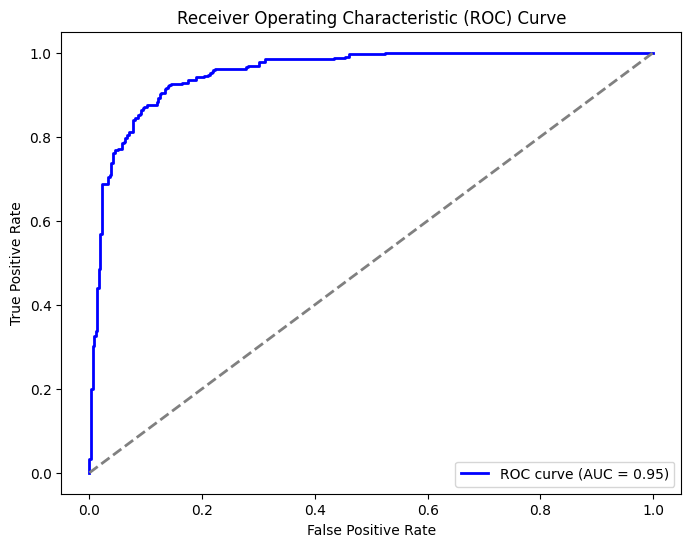

Accuracy: 0.8838
Precision: 0.8952
Recall: 0.8763
F1-Score: 0.8856


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import tensorflow as tf

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5 for binary classification

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Abnormal'], yticklabels=['Healthy', 'Abnormal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate Accuracy
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-Score
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) != 0 else 0
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

# Weighted Average Metrics
# If you have class imbalance, you can calculate weighted averages for precision, recall, and F1-score as well.
# This is automatically handled by the classification_report function.


In [ ]:
!ls

drive  sample_data


# Multiclass model development

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
# Corresponding folders excluding the Healthy class
folder_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiectasis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiolitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/COPD Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Lung Fibrosis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Plueral Effusion Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Pneumonia Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/URTI Normalized'
]

In [ ]:
# Mapping each folder to a class label
labels = {
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized': 0,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiectasis Normalized': 1,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiolitis Normalized': 2,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchitis Normalized': 3,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/COPD Normalized': 4,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Lung Fibrosis Normalized': 5,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Plueral Effusion Normalized': 6,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Pneumonia Normalized': 7,
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/URTI Normalized': 8
}


In [ ]:
# Feature extraction parameters
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set a fixed length for all audio samples

# Function to extract features from an audio file
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))

    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)
    return features_3d

In [ ]:
# Extract features from all folders and combine them
all_features = []
all_labels = []
for folder in folder_paths:
    folder_features = []
    for filename in os.listdir(folder):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder, filename)
            features_3d = extract_features(file_path)
            folder_features.append(features_3d)
            all_labels.append(labels[folder])
    all_features.extend(folder_features)

# Convert to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

In [ ]:
# Define the CNN model for multiclass classification
input_shape = (128, 264, 3)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))  # 9 classes for multiclass classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 262, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 131, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 129, 32)         │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 14, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 12, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 930,985 (3.55 MB)

 Trainable params: 930,985 (3.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.1310 - loss: 2.9098 - val_accuracy: 0.2333 - val_loss: 2.1164
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1745 - loss: 2.1326 - val_accuracy: 0.2528 - val_loss: 1.9635
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2373 - loss: 1.9616 - val_accuracy: 0.2806 - val_loss: 1.8110
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2713 - loss: 1.8619 - val_accuracy: 0.3861 - val_loss: 1.6518
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.3867 - loss: 1.6402 - val_accuracy: 0.4917 - val_loss: 1.4803
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.4253 - loss: 1.5014 - val_accuracy: 0.5778 - val_loss: 1.3361
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4679 - loss: 1.4349 - val_accuracy: 0.5944 - val_loss: 1.2230
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5485 - loss: 1.2524 - val_accuracy: 0.6361 - v

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 508ms/step - accuracy: 0.8446 - loss: 0.4513
Test Accuracy: 84.72%


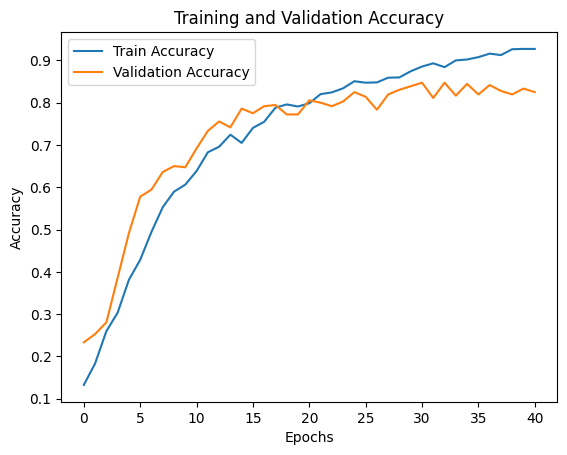

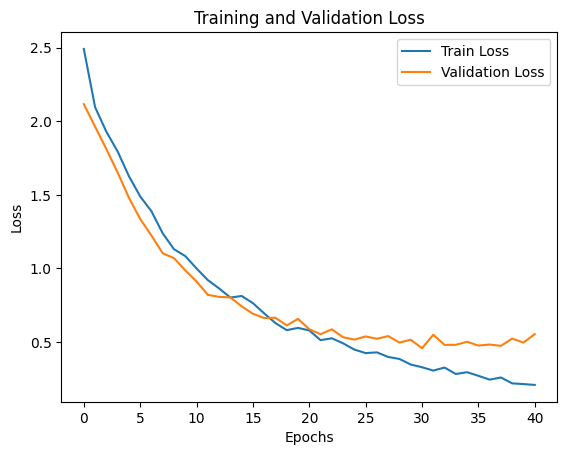

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 593ms/step
Accuracy: 0.8472222222222222
Precision: 0.8561668420219538
Recall: 0.8472222222222222
F1-Score: 0.8481042947812202
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.88      0.75        40
           1       0.95      0.97      0.96        40
           2       0.83      0.88      0.85        40
           3       0.95      0.97      0.96        40
           4       1.00      0.78      0.87        40
           5       0.89      0.85      0.87        40
           6       0.97      0.95      0.96        40
           7       0.73      0.68      0.70        40
           8       0.71      0.68      0.69        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360



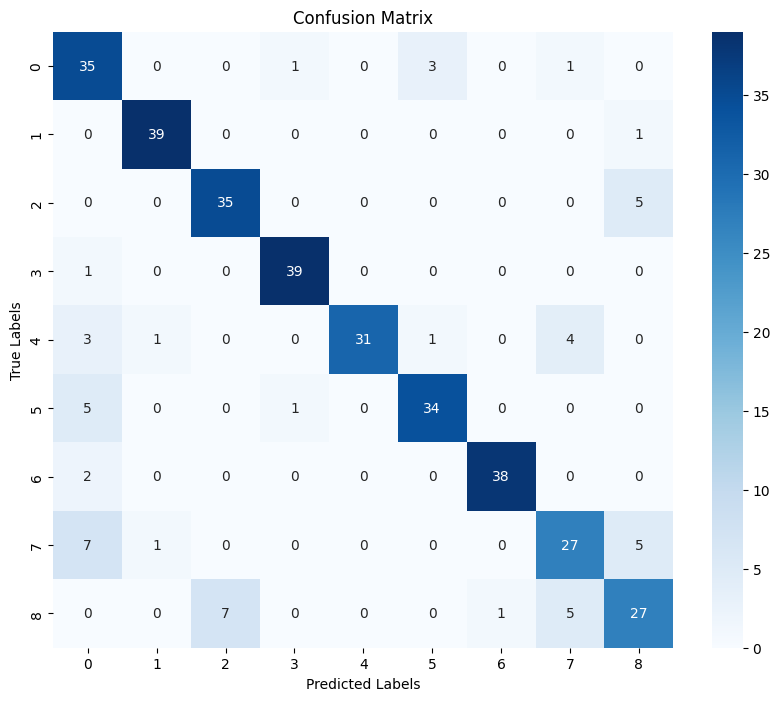

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 421ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 460ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 344ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 533ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 334ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 499ms/step


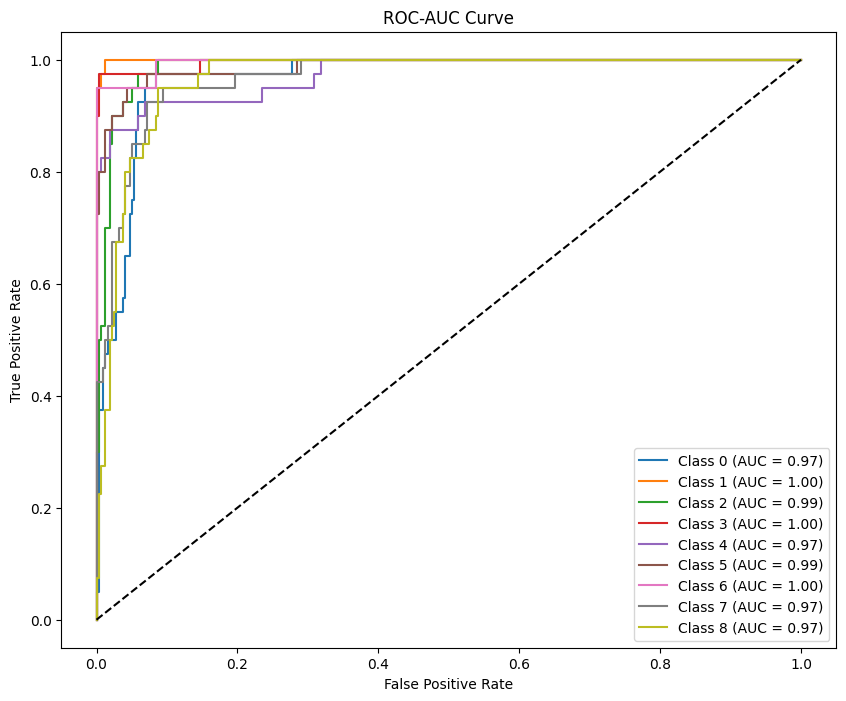

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 460ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 359ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 319ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step
Cross-Validation Accuracy: 0.5744444444444445
Cross-Validation F1-Score: 0.557049433728533


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Evaluate on test data
y_pred = np.argmax(model.predict(X_test), axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Classification report for detailed per-class performance
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}

# One-hot encode y_test for ROC calculation per class
y_test_one_hot = to_categorical(y_test, num_classes=9)

for i in range(9):  # 9 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], model.predict(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="best")
plt.show()

# Cross-Validation for robustness
skf = StratifiedKFold(n_splits=5)
cross_val_accuracy = []
cross_val_f1 = []

for train_index, val_index in skf.split(all_features, all_labels):
    X_train_cv, X_val_cv = all_features[train_index], all_features[val_index]
    y_train_cv, y_val_cv = all_labels[train_index], all_labels[val_index]

    # Train model on cross-validation split
    model_cv = tf.keras.models.clone_model(model)
    model_cv.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_cv.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=0)  # Train for fewer epochs for quick validation

    # Evaluate cross-validation accuracy and F1-score
    y_val_pred = np.argmax(model_cv.predict(X_val_cv), axis=1)
    cross_val_accuracy.append(accuracy_score(y_val_cv, y_val_pred))
    cross_val_f1.append(f1_score(y_val_cv, y_val_pred, average='weighted'))

print("Cross-Validation Accuracy:", np.mean(cross_val_accuracy))
print("Cross-Validation F1-Score:", np.mean(cross_val_f1))


In [ ]:
# Save the trained multiclass model
model.save('lung_sound_multiclass_classification_model.h5')
print("Multiclass model saved successfully!")

Multiclass model saved successfully!


In [ ]:
import tensorflow as tf
import librosa
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('lung_sound_binary_classification_model.h5')

# Feature extraction parameters (same as during training)
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set the fixed length used during training

def extract_features(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    # Extract Mel Spectrogram and match frequency axis to MFCC
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))

    # Extract Chromagram and match frequency axis to MFCC
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))

    # Stack MFCC, Mel Spectrogram, and Chromagram along the third axis to create a 3D array
    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)

    return features_3d

def classify_audio_file(audio_file):
    # Extract features from the audio file
    features_3d = extract_features(audio_file)

    # Reshape the features to match the input shape of the model
    features_3d = np.expand_dims(features_3d, axis=0)

    # Make prediction
    prediction = model.predict(features_3d)

    # Determine the classification based on the prediction
    if prediction[0][0] > 0.5:
        print("The audio file is classified as: Healthy")
    else:
        print("The audio file is classified as: Abnormal")

    # Output the prediction value
    print(f"Prediction confidence: {prediction[0][0]}")

# Example usage
audio_file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Test Binary/Healthy/194_1b1_Pr_sc_Meditron.wav'
classify_audio_file(audio_file_path)


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
The audio file is classified as: Healthy
Prediction confidence: 0.9803069233894348


In [ ]:
import tensorflow as tf
import librosa
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('lung_sound_binary_classification_model.h5')

# Feature extraction parameters (same as during training)
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set the fixed length used during training

def extract_features(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    # Extract Mel Spectrogram and match frequency axis to MFCC
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))

    # Extract Chromagram and match frequency axis to MFCC
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))

    # Stack MFCC, Mel Spectrogram, and Chromagram along the third axis to create a 3D array
    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)

    return features_3d

def classify_audio_file(audio_file):
    # Extract features from the audio file
    features_3d = extract_features(audio_file)

    # Reshape the features to match the input shape of the model
    features_3d = np.expand_dims(features_3d, axis=0)

    # Make prediction
    prediction = model.predict(features_3d)

    # Determine the classification based on the prediction
    if prediction[0][0] > 0.5:
        print("The audio file is classified as: Healthy")
    else:
        print("The audio file is classified as: Abnormal")

    # Output the prediction value
    print(f"Prediction confidence: {prediction[0][0]}")

# Example usage
audio_file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Test Binary/Disease/149_1b1_Al_sc_Meditron.wav'
classify_audio_file(audio_file_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
The audio file is classified as: Healthy
Prediction confidence: 0.9998875856399536


In [ ]:
import tensorflow as tf
import librosa
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('lung_sound_binary_classification_model.h5')

# Feature extraction parameters (same as during training)
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set the fixed length used during training

def extract_features(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    # Extract Mel Spectrogram and match frequency axis to MFCC
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))

    # Extract Chromagram and match frequency axis to MFCC
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))

    # Stack MFCC, Mel Spectrogram, and Chromagram along the third axis to create a 3D array
    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)

    return features_3d

def classify_audio_file(audio_file):
    # Extract features from the audio file
    features_3d = extract_features(audio_file)

    # Reshape the features to match the input shape of the model
    features_3d = np.expand_dims(features_3d, axis=0)

    # Make prediction
    prediction = model.predict(features_3d)

    # Determine the classification based on the prediction
    if prediction[0][0] > 0.5:
        print("The audio file is classified as: Healthy")
    else:
        print("The audio file is classified as: Abnormal")

    # Output the prediction value
    print(f"Prediction confidence: {prediction[0][0]}")

# Example usage
audio_file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Test Binary/Disease/BP22_BRON,Crep,P R U,24,M.wav'
classify_audio_file(audio_file_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
The audio file is classified as: Abnormal
Prediction confidence: 0.055736660957336426


In [ ]:
import tensorflow as tf
import librosa
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('lung_sound_binary_classification_model.h5')

# Feature extraction parameters (same as during training)
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set the fixed length used during training

def extract_features(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    # Extract Mel Spectrogram and match frequency axis to MFCC
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))

    # Extract Chromagram and match frequency axis to MFCC
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))

    # Stack MFCC, Mel Spectrogram, and Chromagram along the third axis to create a 3D array
    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)

    return features_3d

def classify_audio_file(audio_file):
    # Extract features from the audio file
    features_3d = extract_features(audio_file)

    # Reshape the features to match the input shape of the model
    features_3d = np.expand_dims(features_3d, axis=0)

    # Make prediction
    prediction = model.predict(features_3d)

    # Determine the classification based on the prediction
    if prediction[0][0] > 0.5:
        print("The audio file is classified as: Healthy")
    else:
        print("The audio file is classified as: Abnormal")

    # Output the prediction value
    print(f"Prediction confidence: {prediction[0][0]}")

# Example usage
audio_file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Test Binary/Disease/169_1b2_Ll_sc_Meditron.wav'
classify_audio_file(audio_file_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
The audio file is classified as: Abnormal
Prediction confidence: 0.17597201466560364


In [ ]:
import tensorflow as tf
import librosa
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('lung_sound_binary_classification_model.h5')

# Feature extraction parameters (same as during training)
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set the fixed length used during training

def extract_features(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    # Extract Mel Spectrogram and match frequency axis to MFCC
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))

    # Extract Chromagram and match frequency axis to MFCC
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))

    # Stack MFCC, Mel Spectrogram, and Chromagram along the third axis to create a 3D array
    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)

    return features_3d

def classify_audio_file(audio_file):
    # Extract features from the audio file
    features_3d = extract_features(audio_file)

    # Reshape the features to match the input shape of the model
    features_3d = np.expand_dims(features_3d, axis=0)

    # Make prediction
    prediction = model.predict(features_3d)

    # Determine the classification based on the prediction
    if prediction[0][0] > 0.5:
        print("The audio file is classified as: Healthy")
    else:
        print("The audio file is classified as: Abnormal")

    # Output the prediction value
    print(f"Prediction confidence: {prediction[0][0]}")

# Example usage
audio_file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Test Binary/Disease/EP4_Heart Failure + Lung Fibrosis ,I C,P L R,72,F.wav'
classify_audio_file(audio_file_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
The audio file is classified as: Abnormal
Prediction confidence: 0.03167058899998665


In [ ]:
import tensorflow as tf
import librosa
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('lung_sound_binary_classification_model.h5')

# Feature extraction parameters (same as during training)
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set the fixed length used during training

def extract_features(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    # Extract Mel Spectrogram and match frequency axis to MFCC
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))

    # Extract Chromagram and match frequency axis to MFCC
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))

    # Stack MFCC, Mel Spectrogram, and Chromagram along the third axis to create a 3D array
    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)

    return features_3d

def classify_audio_file(audio_file):
    # Extract features from the audio file
    features_3d = extract_features(audio_file)

    # Reshape the features to match the input shape of the model
    features_3d = np.expand_dims(features_3d, axis=0)

    # Make prediction
    prediction = model.predict(features_3d)

    # Determine the classification based on the prediction
    if prediction[0][0] > 0.5:
        print("The audio file is classified as: Healthy")
    else:
        print("The audio file is classified as: Abnormal")

    # Output the prediction value
    print(f"Prediction confidence: {prediction[0][0]}")

# Example usage
audio_file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Test Binary/Disease/103_2b2_Ar_mc_LittC2SE.wav'
classify_audio_file(audio_file_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
The audio file is classified as: Healthy
Prediction confidence: 0.6935760378837585


In [ ]:
import tensorflow as tf
import librosa
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('lung_sound_binary_classification_model.h5')

# Feature extraction parameters (same as during training)
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set the fixed length used during training

def extract_features(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    # Extract Mel Spectrogram and match frequency axis to MFCC
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))

    # Extract Chromagram and match frequency axis to MFCC
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))

    # Stack MFCC, Mel Spectrogram, and Chromagram along the third axis to create a 3D array
    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)

    return features_3d

def classify_audio_file(audio_file):
    # Extract features from the audio file
    features_3d = extract_features(audio_file)

    # Reshape the features to match the input shape of the model
    features_3d = np.expand_dims(features_3d, axis=0)

    # Make prediction
    prediction = model.predict(features_3d)

    # Determine the classification based on the prediction
    if prediction[0][0] > 0.5:
        print("The audio file is classified as: Healthy")
    else:
        print("The audio file is classified as: Abnormal")

    # Output the prediction value
    print(f"Prediction confidence: {prediction[0][0]}")

# Example usage
audio_file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Test Binary/Disease/161_1b1_Pl_sc_Meditron.wav'
classify_audio_file(audio_file_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
The audio file is classified as: Abnormal
Prediction confidence: 0.06216678395867348


## Hybrid Model (CNN + LSTM (A RNN Model))

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Feature extraction parameters (keeping them as defined)
n_fft = 2048
hop_length = 512
n_mfcc = 128
fixed_length = 264  # Set a fixed length for all audio samples

# Define folder paths and labels (keeping them as defined)
folder_paths = [
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Asthma Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiectasis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchiolitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Bronchitis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/COPD Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Lung Fibrosis Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Plueral Effusion Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/Pneumonia Normalized',
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Lung Sound Files Dataset/URTI Normalized'
]
labels = {path: idx for idx, path in enumerate(folder_paths)}

In [ ]:
# Function to extract features
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = librosa.util.fix_length(mfcc, size=fixed_length, axis=1)

    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = librosa.util.fix_length(mel_spectrogram, size=fixed_length, axis=1)
    mel_spectrogram = np.resize(mel_spectrogram, (n_mfcc, fixed_length))

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    chroma_stft = librosa.util.fix_length(chroma_stft, size=fixed_length, axis=1)
    chroma_stft = np.resize(chroma_stft, (n_mfcc, fixed_length))

    features_3d = np.stack((mfcc, mel_spectrogram, chroma_stft), axis=-1)
    return features_3d

In [ ]:
# Data processing (same as provided)
all_features = []
all_labels = []
for folder in folder_paths:
    for filename in os.listdir(folder):
        if filename.endswith(".wav"):
            file_path = os.path.join(folder, filename)
            features_3d = extract_features(file_path)
            all_features.append(features_3d)
            all_labels.append(labels[folder])

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
# Convert to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

In [ ]:
# Define the Hybrid CNN-LSTM model
input_shape = (128, 264, 3)
model = Sequential()

# CNN layers for spatial feature extraction
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adjust the Reshape layer to match the actual output shape
# Output shape after the CNN layers is (6, 14, 64), so we reshape to (6, 896)
model.add(Reshape((6, 896)))  # (6 time steps, 896 features)

# LSTM layers for temporal feature extraction
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))  # 9 classes for multiclass classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 262, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 131, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 129, 32)         │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 14, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 6, 896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 6, 64)               │         246,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,089 (1.35 MB)

 Trainable params: 354,089 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.1096 - loss: 2.2130 - val_accuracy: 0.1139 - val_loss: 2.1976
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.1284 - loss: 2.2030 - val_accuracy: 0.1611 - val_loss: 2.1961
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.1110 - loss: 2.1940 - val_accuracy: 0.1167 - val_loss: 2.1962
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.1310 - loss: 2.1930 - val_accuracy: 0.1611 - val_loss: 2.1859
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.1308 - loss: 2.1892 - val_accuracy: 0.1778 - val_loss: 2.1703
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.1518 - loss: 2.1702 - val_accuracy: 0.1972 - val_loss: 2.1362
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.1662 - loss: 2.1351 - val_accuracy: 0.2000 - val_loss: 2.0623
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.2016 - loss: 2.0706 - val_accuracy: 0.2444 - v

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 503ms/step - accuracy: 0.8235 - loss: 0.6146
Test Accuracy: 83.06%


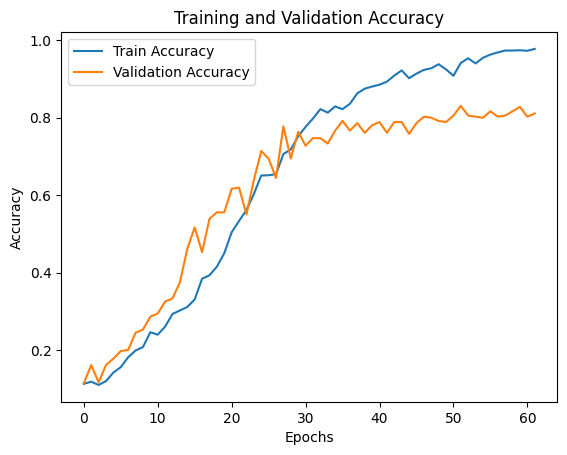

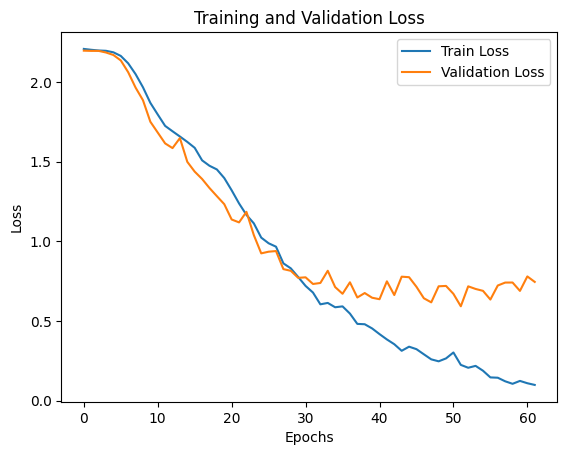

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Save the trained multiclass model
model.save('lung_sound_Hybrid_multiclass_classification_model.h5')
print("Hybrid Multiclass model saved successfully!")

Hybrid Multiclass model saved successfully!


12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 906ms/step
Accuracy: 0.8305555555555556
Precision: 0.8394446124456599
Recall: 0.8305555555555556
F1-Score: 0.8320661112873957
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.80      0.74        40
           1       0.91      0.97      0.94        40
           2       0.78      0.88      0.82        40
           3       1.00      0.93      0.96        40
           4       0.87      0.68      0.76        40
           5       0.94      0.85      0.89        40
           6       1.00      0.95      0.97        40
           7       0.67      0.70      0.68        40
           8       0.71      0.72      0.72        40

    accuracy                           0.83       360
   macro avg       0.84      0.83      0.83       360
weighted avg       0.84      0.83      0.83       360



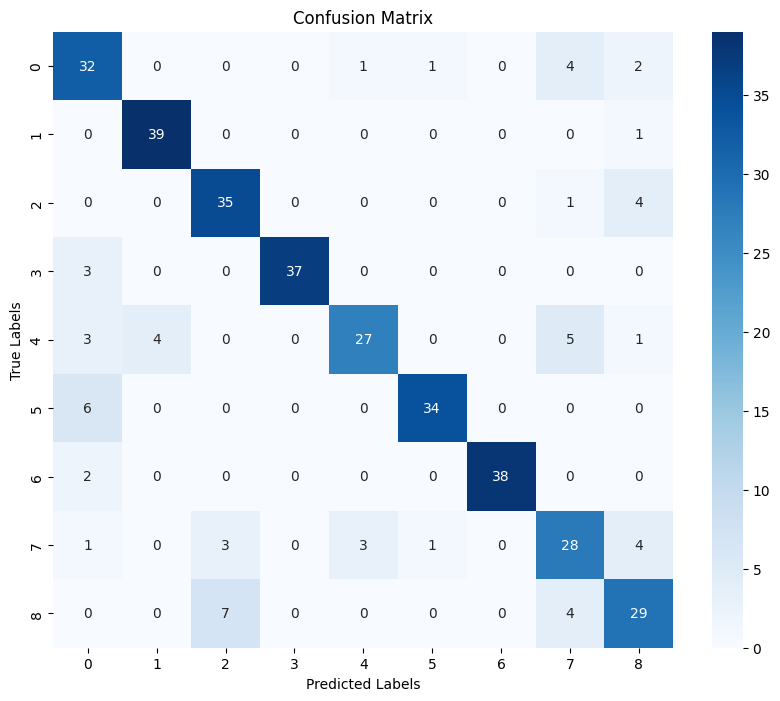

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 297ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 385ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 395ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 385ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 395ms/step


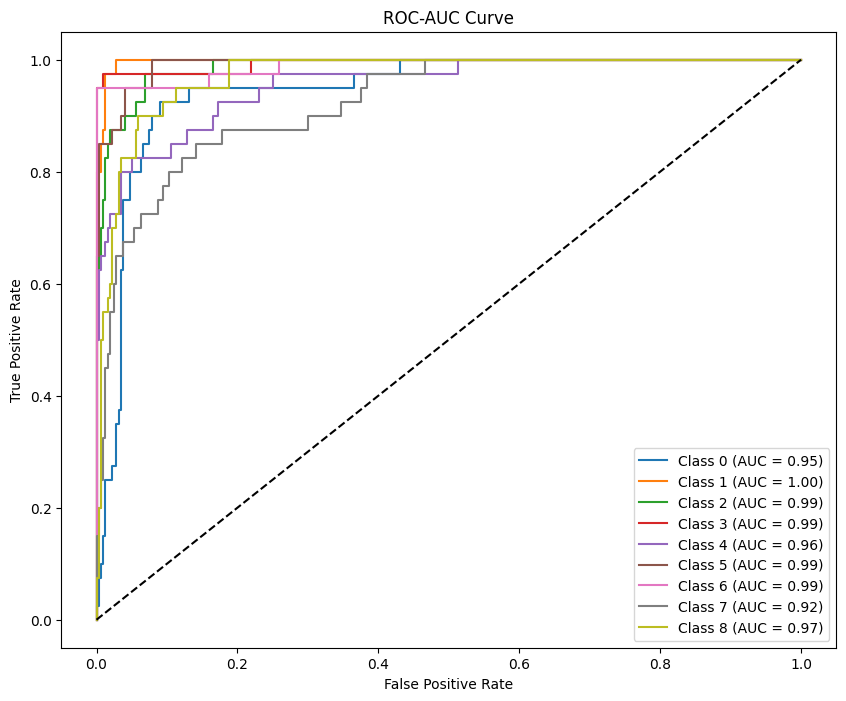

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 333ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 424ms/step
Cross-Validation Accuracy: 0.3338888888888889
Cross-Validation F1-Score: 0.26793150257059517


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Classification report for detailed per-class performance
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Curve for each class
fpr = {}
tpr = {}
roc_auc = {}

# One-hot encode y_test for ROC calculation per class
y_test_one_hot = to_categorical(y_test, num_classes=9)

for i in range(9):  # 9 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], model.predict(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="best")
plt.show()

# Cross-Validation for robustness
skf = StratifiedKFold(n_splits=5)
cross_val_accuracy = []
cross_val_f1 = []

for train_index, val_index in skf.split(all_features, all_labels):
    X_train_cv, X_val_cv = all_features[train_index], all_features[val_index]
    y_train_cv, y_val_cv = all_labels[train_index], all_labels[val_index]

    # Train model on cross-validation split
    model_cv = tf.keras.models.clone_model(model)
    model_cv.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_cv.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=0)  # Train for fewer epochs for quick validation

    # Evaluate cross-validation accuracy and F1-score
    y_val_pred = np.argmax(model_cv.predict(X_val_cv), axis=1)
    cross_val_accuracy.append(accuracy_score(y_val_cv, y_val_pred))
    cross_val_f1.append(f1_score(y_val_cv, y_val_pred, average='weighted'))

print("Cross-Validation Accuracy:", np.mean(cross_val_accuracy))
print("Cross-Validation F1-Score:", np.mean(cross_val_f1))
